In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import IPython
from typing import List, Tuple, Dict, Any
import textalloc as ta
import logging

notebook_path = Path(IPython.extract_module_locals()[1]["__vsc_ipynb_file__"])
project_dir = notebook_path.parent.parent
sys.path.append(str(project_dir))
import src.utils.custom_log as custom_log
from src.utils.set_rcparams import set_rcparams

os.chdir(project_dir)
LOG = logging.getLogger(__name__)
custom_log.init_logger(log_lvl=logging.INFO)

READ_NEW = False
LOG.info("Log initialized - Read New %s", READ_NEW)

set_rcparams()

2024-12-02 14:48:50,998     INFO  MainProcess  MainThread Log initialized - Read New False
2024-12-02 14:48:51,000     INFO  MainProcess  MainThread Setting rcparams for matplotlib
2024-12-02 14:48:51,013     INFO  MainProcess  MainThread Using style src/visualization/dissertation.mplstyle


In [2]:
FULL_WIDTH: float = 448.13095 / 72

In [3]:
FIG_PATH:Path = project_dir / "reports" / "figures" / notebook_path.stem
FIG_PATH.mkdir(parents=True, exist_ok=True)
LOG.info("Figure path: %s", FIG_PATH)

2024-12-02 14:48:51,037     INFO  MainProcess  MainThread Figure path: /root/py_projects/aihiii/reports/figures/951_Example_Feature_transformation


/tmp/ipykernel_578651/3418535292.py:26: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax["lin"].scatter(a, b, label="Original", c=cs[0], s=s)
/tmp/ipykernel_578651/3418535292.py:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax["lin"].scatter(c, b, label="Transformed", c=cs[1], s=s)
/tmp/ipykernel_578651/3418535292.py:38: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided a

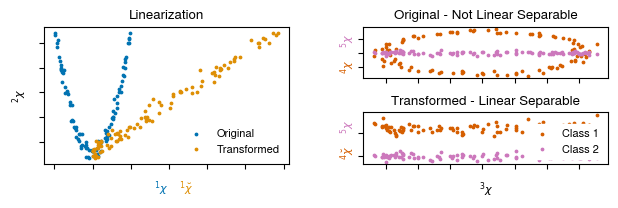

In [12]:
def plot_upscale():
    rng = np.random.RandomState(42)
    jt = 0.05

    # data transform
    a = np.arange(-5, 5.1, 0.1)
    a += 2 * rng.normal(0, 0.1, len(a))
    b = a**2 + 3 + 10 * rng.normal(0, 0.1, len(a))
    c = a**2

    # data upscale
    theta = np.linspace(0, 2 * np.pi, 100)
    r = np.sqrt(0.6)
    s = 3
    x1 = r * np.cos(theta) + jt * rng.normal(0, 1, len(theta))
    x2 = r * np.sin(theta) + jt * rng.normal(0, 1, len(theta))
    x3 = jt * rng.normal(0, 1, len(theta))
    x4 = jt * rng.normal(0, 1, len(theta))

    # prepare plot
    cs = sns.color_palette("colorblind")
    fields = [["lin", "cat_raw"], ["lin", "cat_trans"]]
    fig, ax = plt.subplot_mosaic(fields, figsize=(FULL_WIDTH, 0.35 * FULL_WIDTH))

    # lin
    ax["lin"].scatter(a, b, label="Original", c=cs[0], s=s)
    ax["lin"].scatter(c, b, label="Transformed", c=cs[1], s=s)
    # ax["lin"].set_xlabel("$\chi_1$, $\chi_1$\'")
    ax["lin"].text(0.45, -0.2, "$^1 \chi$", color=cs[0], transform=ax["lin"].transAxes)#, rotation='vertical', transform=ax["lin"].transAxes)
    ax["lin"].text(0.55, -0.2, r"$^1 \breve \chi$", color=cs[1], transform=ax["lin"].transAxes)#, rotation='vertical', transform=ax["lin"].transAxes)
    ax["lin"].set_ylabel("$^2 \chi$")
    ax["lin"].set_xticklabels([])
    ax["lin"].set_yticklabels([])
    ax["lin"].legend()
    ax["lin"].set_title("Linearization")

    # raw cat
    ax["cat_raw"].scatter(x1, x2, c=cs[3], s=s)
    ax["cat_raw"].scatter(x1, x4, c=cs[4], s=s)
    ax["cat_raw"].set_xticklabels([])
    ax["cat_raw"].set_yticklabels([])
    #ax["cat_raw"].set_ylabel("$\chi_4$, $\chi_5$")
    ax["cat_raw"].text(-0.1, 0.2, "$^4 \chi$", color=cs[3], rotation='vertical', transform=ax["cat_raw"].transAxes)
    ax["cat_raw"].text(-0.1, 0.7, "$^5 \chi$", color=cs[4], rotation='vertical', transform=ax["cat_raw"].transAxes)
    ax["cat_raw"].set_title("Original - Not Linear Separable")

    # trans cat
    ax["cat_trans"].scatter(x1, x1**2 + x2**2, c=cs[3], s=s, label="Class 1")
    # ax["cat_trans"].scatter(x3, x3**2+x4**2, c=cs[4], s=s, label='Class 2')
    ax["cat_trans"].scatter(x1, x4, c=cs[4], s=s, label="Class 2")
    ax["cat_trans"].set_xticklabels([])
    ax["cat_trans"].set_yticklabels([])
    ax["cat_trans"].set_xlabel("$^3 \chi$")
    # ax["cat_trans"].set_ylabel("$\chi_4$\', $\chi_5$")
    ax["cat_trans"].text(-0.1, 0.2, r"$^4 \breve \chi$", color=cs[3], rotation='vertical', transform=ax["cat_trans"].transAxes)
    ax["cat_trans"].text(-0.1, 0.7, "$^5 \chi$", color=cs[4], rotation='vertical', transform=ax["cat_trans"].transAxes)
    ax["cat_trans"].set_title("Transformed - Linear Separable")
    ax["cat_trans"].legend(loc=4, facecolor="white", framealpha=1, frameon=True, edgecolor="white")

    fig.tight_layout()
    fig.subplots_adjust(wspace=0.3)
    fig.savefig(FIG_PATH / "transformations.pdf")


plot_upscale()